In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pathlib 
import random

In [3]:
path = '../input/alzheimer-mri-dataset/Dataset/'
data_dir = pathlib.Path(path)

In [4]:
class_names = np.array([sorted(item.name for item in data_dir.glob("*"))])
class_names

array([['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
        'Very_Mild_Demented']], dtype='<U18')

In [5]:
imageCount = len(list(data_dir.glob("*/*.jpg") ))
imageCount

6400

In [6]:
def plot(path,class_name):
    print(path)
    plt.figure(figsize=(8,8))
    
    img = plt.imread(path)
    
    plt.xticks([])
    plt.yticks([])
    plt.title("Class Name: "+class_name)
    plt.imshow(img)

../input/alzheimer-mri-dataset/Dataset/Mild_Demented/mild_536.jpg


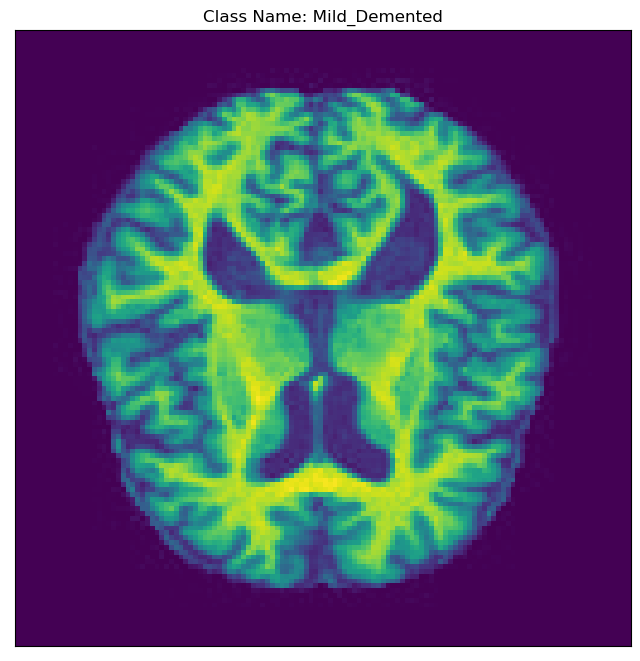

In [7]:
Mild_Demented = random.choice(list(data_dir.glob("Mild_Demented/*.jpg")))

plot(str(Mild_Demented),"Mild_Demented")

../input/alzheimer-mri-dataset/Dataset/Moderate_Demented/moderate_10.jpg


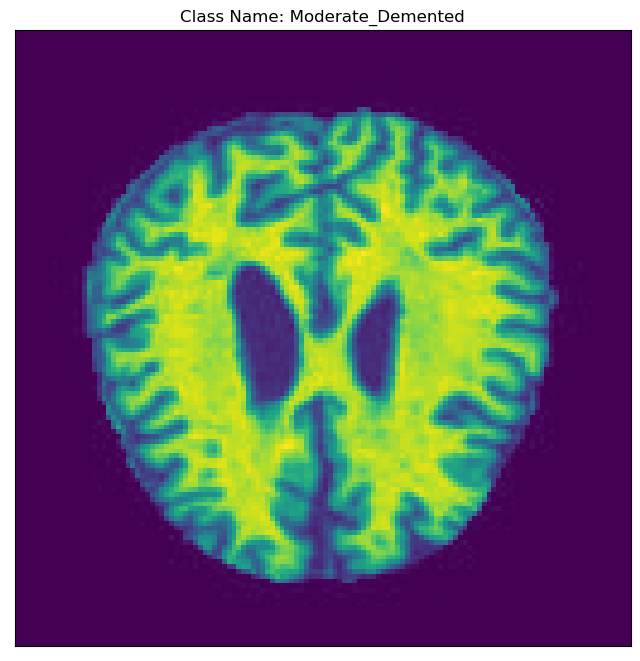

In [8]:
Moderate_Demented = random.choice(list(data_dir.glob("Moderate_Demented/*.jpg")))

plot(str(Moderate_Demented),"Moderate_Demented")

../input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2780.jpg


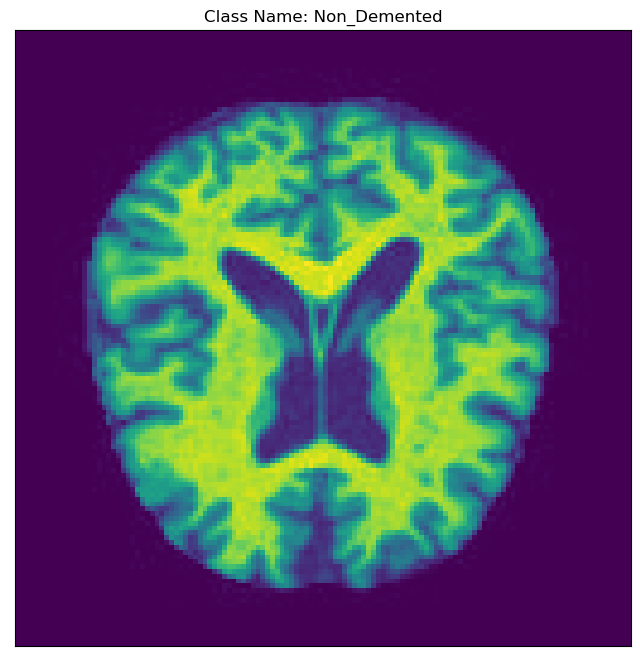

In [9]:
Non_Demented = random.choice(list(data_dir.glob("Non_Demented/*.jpg")))

plot(str(Non_Demented),"Non_Demented")

../input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/verymild_1475.jpg


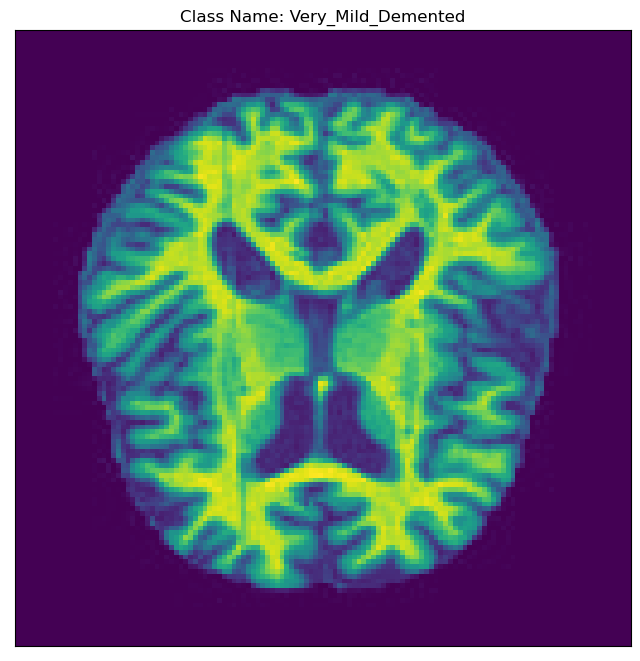

In [10]:
Very_Mild_Demented = random.choice(list(data_dir.glob("Very_Mild_Demented/*.jpg")))

plot(str(Very_Mild_Demented),"Very_Mild_Demented")

In [11]:
batch_size = 32
img_height = 224
img_width = 224

In [12]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


In [13]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    
   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

In [14]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

In [15]:
epochs = 20
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/20


2023-04-19 10:12:27.067455: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


160/160 [==============================] - 32s 128ms/step - loss: 1.0382 - accuracy: 0.5039 - val_loss: 0.9065 - val_accuracy: 0.5641
Epoch 2/20
160/160 [==============================] - 9s 51ms/step - loss: 0.8705 - accuracy: 0.5943 - val_loss: 0.7579 - val_accuracy: 0.6430
Epoch 3/20
160/160 [==============================] - 9s 55ms/step - loss: 0.7071 - accuracy: 0.6795 - val_loss: 0.5910 - val_accuracy: 0.7609
Epoch 4/20
160/160 [==============================] - 8s 51ms/step - loss: 0.5422 - accuracy: 0.7629 - val_loss: 0.4597 - val_accuracy: 0.8180
Epoch 5/20
160/160 [==============================] - 8s 51ms/step - loss: 0.4027 - accuracy: 0.8320 - val_loss: 0.3602 - val_accuracy: 0.8383
Epoch 6/20
160/160 [==============================] - 9s 53ms/step - loss: 0.3051 - accuracy: 0.8762 - val_loss: 0.2237 - val_accuracy: 0.9211
Epoch 7/20
160/160 [==============================] - 8s 50ms/step - loss: 0.2037 - accuracy: 0.9238 - val_loss: 0.2553 - val_accuracy: 0.9023
Epoch 8/

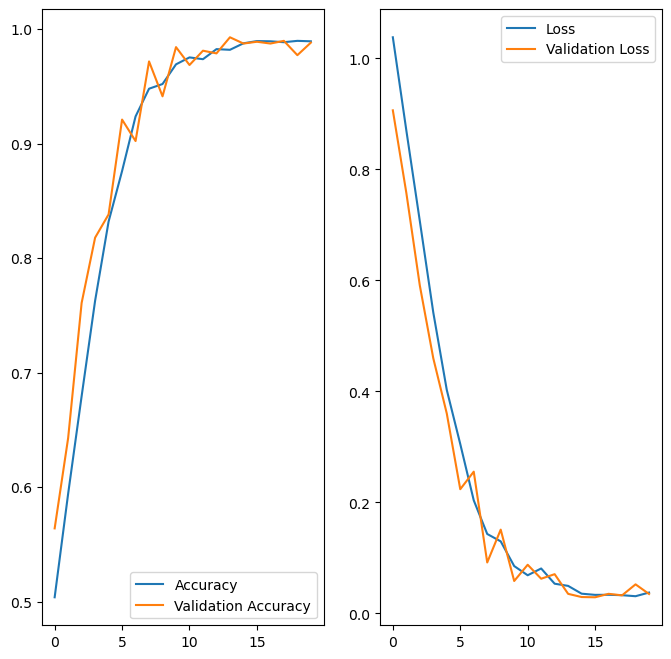

In [16]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 25ms/step


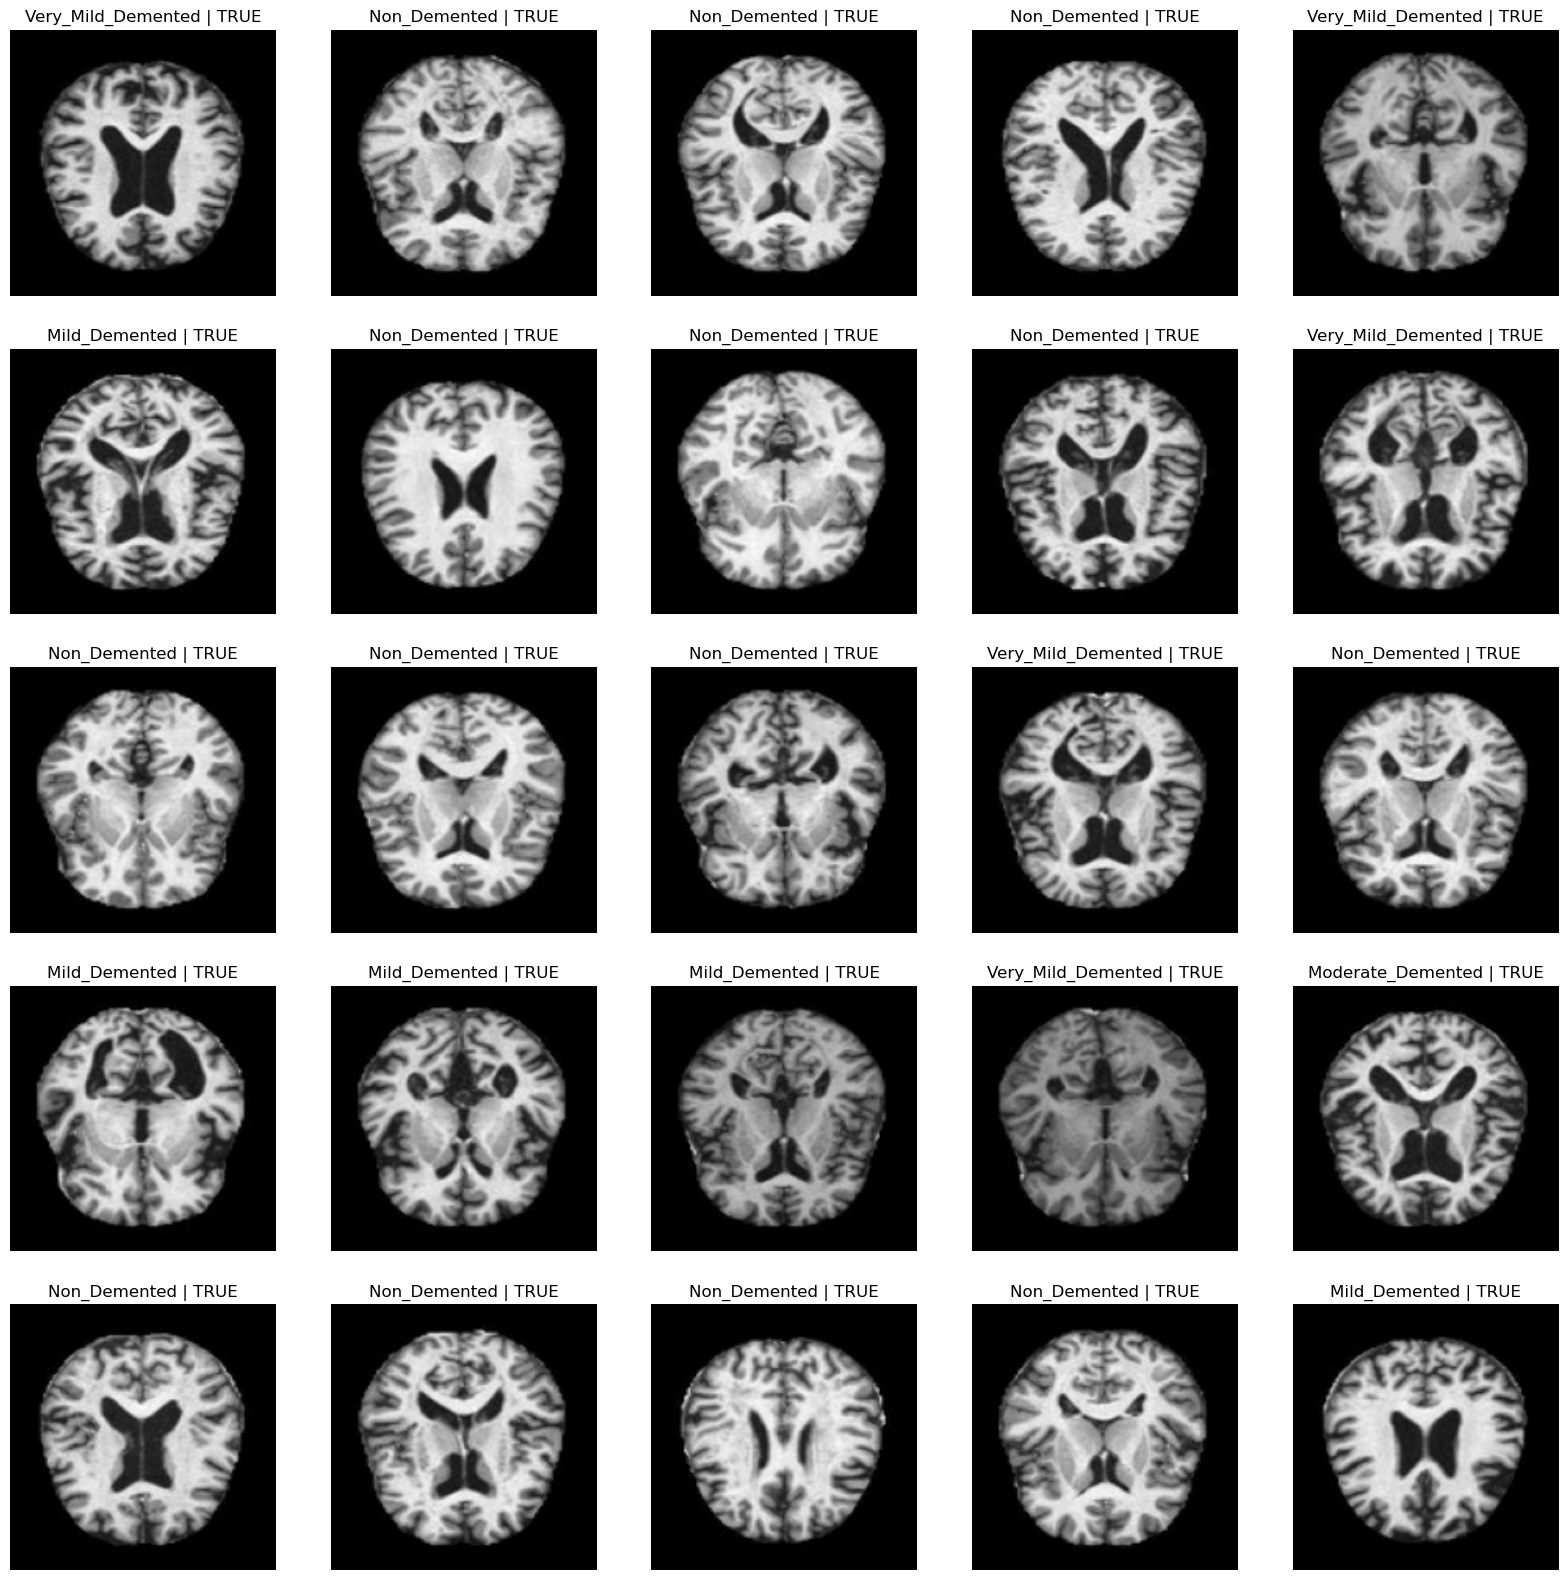

In [17]:
plt.figure(figsize=(20, 20))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")

In [18]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels for the validation set
y_pred = model.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = []
for images, labels in val_data:
    y_true.extend(labels.numpy())

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(conf_mat)


40/40 [==============================] - 1s 31ms/step
[[ 29   1  88  52]
 [  3   0   7   3]
 [ 80   8 340 226]
 [ 57   4 228 154]]


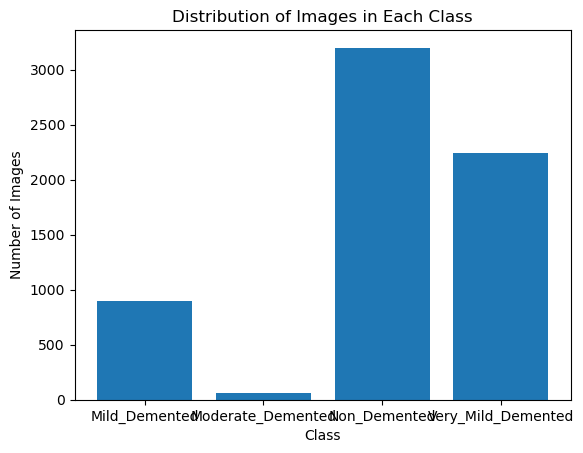

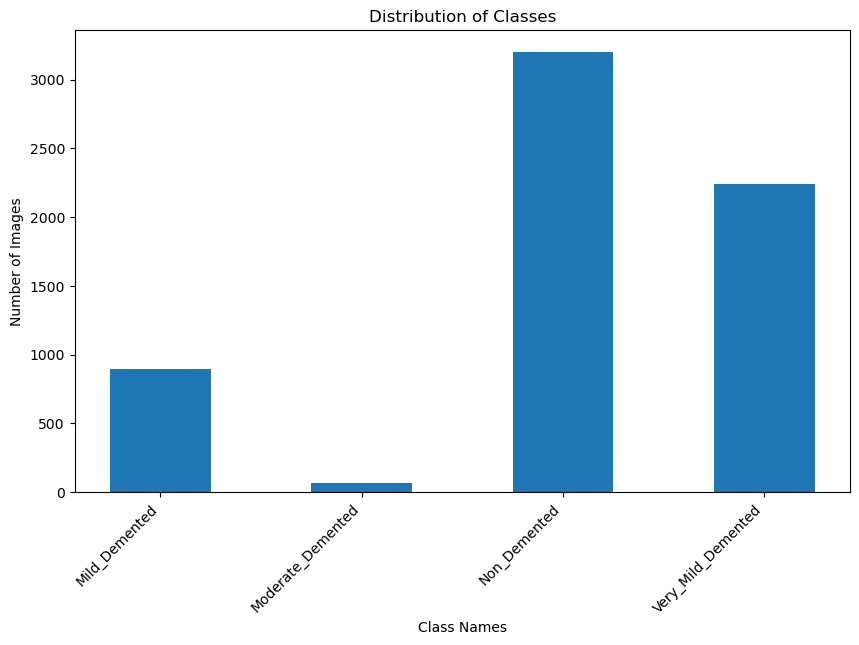

In [19]:
import matplotlib.pyplot as plt 
import os 
import pathlib 

# Define the path to the dataset
path = '../input/alzheimer-mri-dataset/Dataset/'
data_dir = pathlib.Path(path) 

# Get the class names
class_names = sorted(item.name for item in data_dir.glob('*'))

# Get the count of images in each class
class_counts = {}
for class_name in class_names:
    class_dir = os.path.join(path, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))

# Create a bar chart to visualize the distribution of images in each class
plt.bar(class_names, class_counts.values())
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts.values(), width=0.5, align='center')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.show()



40/40 [==============================] - 2s 32ms/step


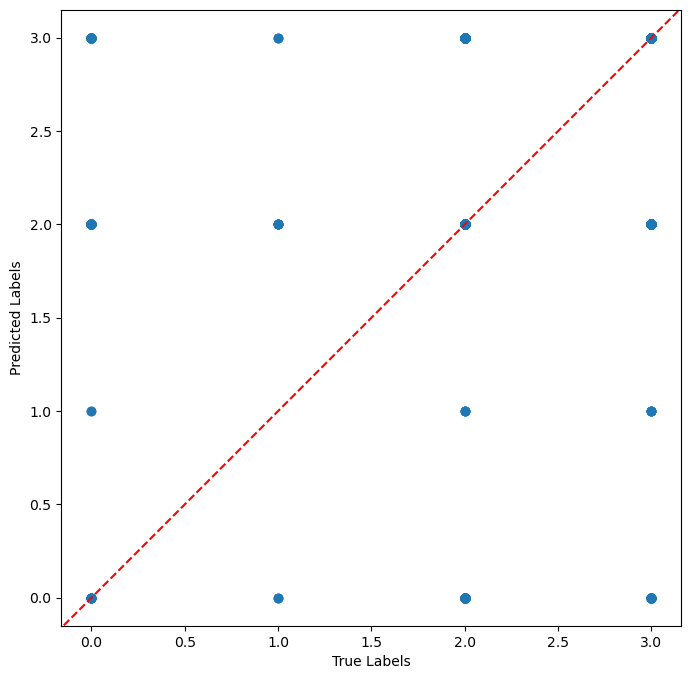

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels for the validation data
true_labels = []
for images, labels in val_data:
    true_labels.extend(labels.numpy())

# Make predictions on the validation data
predicted_labels = model.predict(val_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Plot the true labels against the predicted labels
plt.figure(figsize=(8,8))
plt.scatter(true_labels, predicted_labels)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-0.5, 3.5], [-0.5, 3.5], color='red', linestyle='--')
plt.show()


1/1 [==============================] - 0s 33ms/step


ValueError: num must be 1 <= num <= 16, not 17

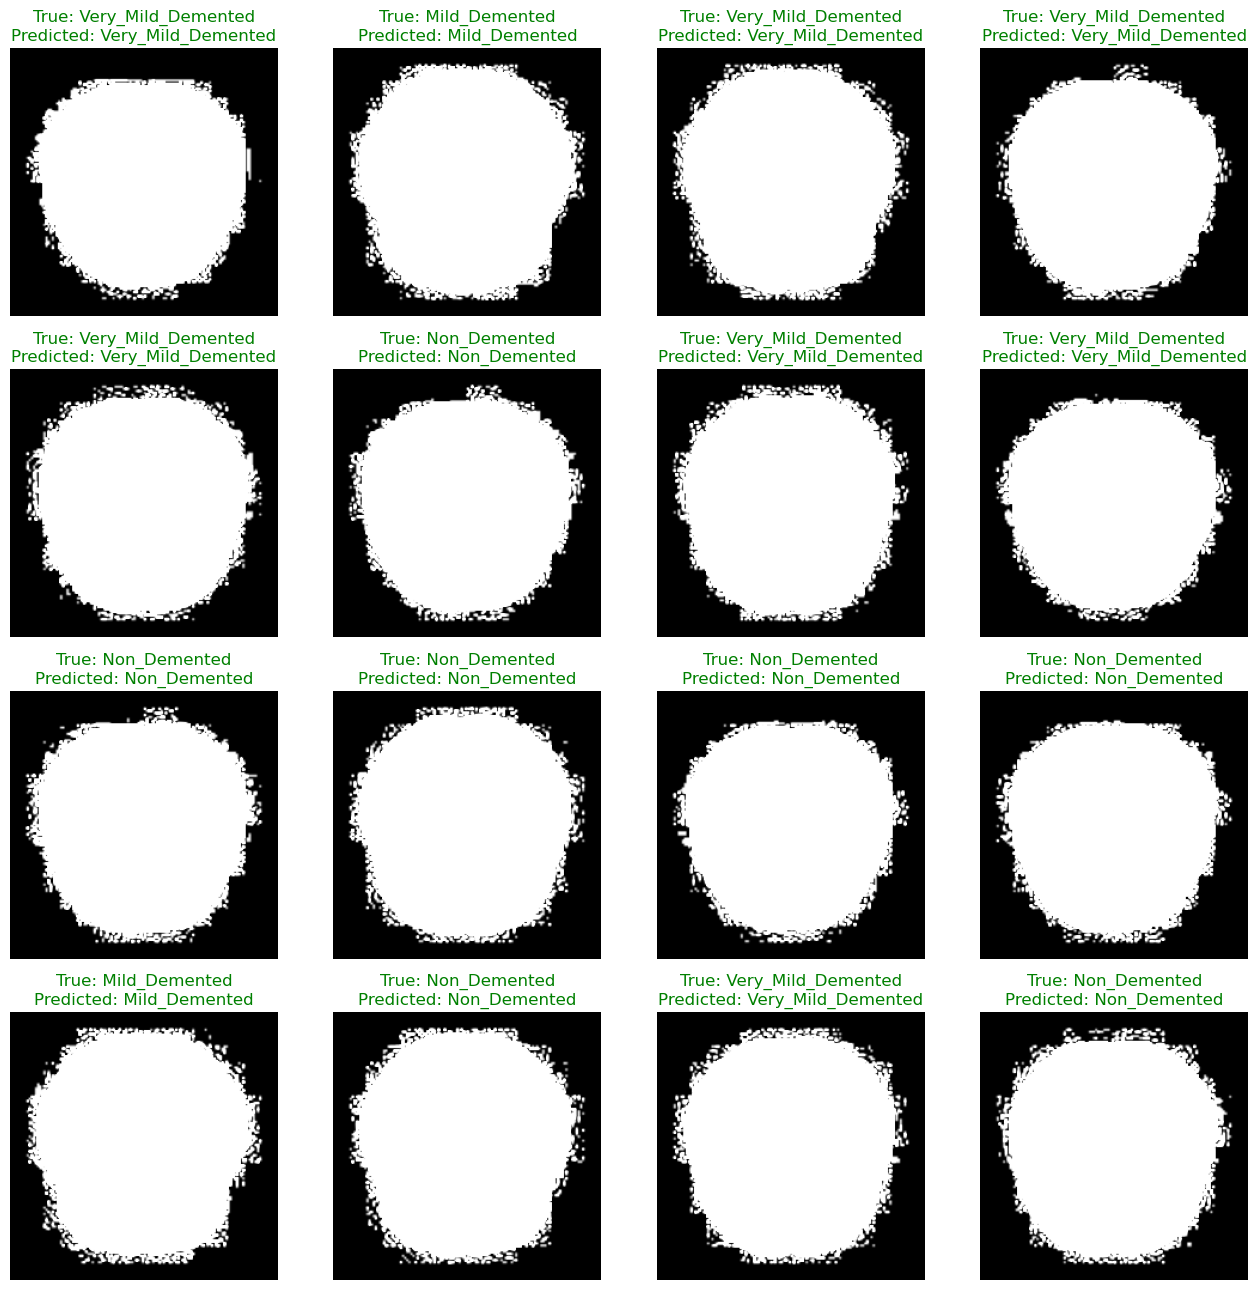

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data
image_batch, label_batch = next(iter(val_data))

# Make predictions on the batch of test data
predictions = model.predict(image_batch)

# Get the predicted class for each image in the batch
predicted_classes = np.argmax(predictions, axis=1)

# Define the class names
class_names = train_data.class_names

# Plot the images in the batch with their true and predicted labels
plt.figure(figsize=(16, 16))
for i in range(len(image_batch)):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(image_batch[i])
    if predicted_classes[i] == label_batch[i]:
        color = 'green'
    else:
        color = 'red'
    plt.title("True: %s\nPredicted: %s" % (class_names[label_batch[i]], class_names[predicted_classes[i]]), color=color)
    plt.axis('off')


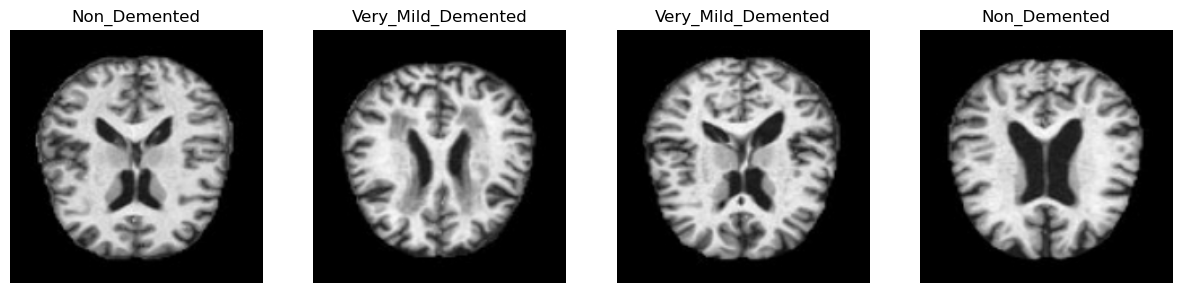

In [27]:
import random

# Extract a batch of 32 images and labels from the training data
for images, labels in train_data.take(1):
    # Plot four random images from the batch
    fig, axs = plt.subplots(1, 4, figsize=(15, 15))
    for ax in axs:
        index = random.randint(0, batch_size - 1)
        img = images[index]
        label = class_names[labels[index]]
        ax.imshow(img.numpy().astype("uint8"))
        ax.set_title(label)
        ax.axis("off")
    plt.show()
